In [1]:
from data_reader import SimulationDataset
from learned_simulator import Simulator
import json
import torch
import lightning as L
from torch.utils.data import DataLoader
import numpy as np
from tqdm import tqdm
from matplotlib import animation
import matplotlib.pyplot as plt
from tf_data_reader import prepare_data_from_tfds

INPUT_SEQUENCE_LENGTH = 6
DEVICE = 'cpu'
MODE = 'train'
STRATEGY = 'baseline'
noise_std = 6.7e-4

ds = prepare_data_from_tfds(data_path='data/', is_rollout=True, batch_size=2)
# with open('metadata.json', 'rb') as f:
#     metadata = json.load(f)

# num_steps = metadata['sequence_length'] - INPUT_SEQUENCE_LENGTH

2024-08-31 20:56:56.805115: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
/local/rmenezes/miniconda3/envs/learning_to_simulate/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
count = 0
for features, labels in ds:
    count+=1
    # print(features['position'].shape)
    
print(count)

30


2024-08-31 20:57:09.031760: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


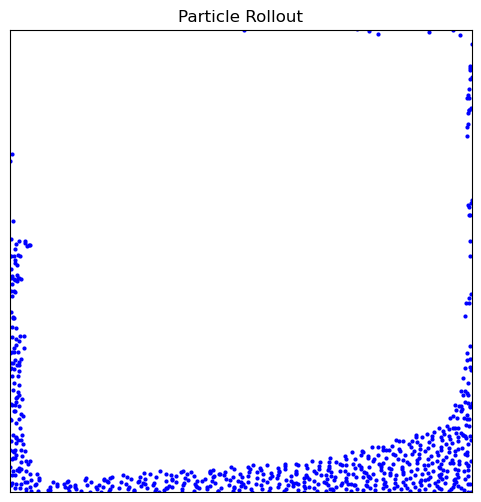

In [25]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import numpy as np

# Convert the tensor to a NumPy array for easier manipulation
trajectory = current_positions.numpy()

# Set up the plot
fig, ax = plt.subplots(figsize=(6, 6))
ax.set_title("Particle Rollout")
ax.set_xlim(0.1, 0.9)  # Set these based on your data's bounds
ax.set_ylim(0.1, 0.9)  # Adjust accordingly
ax.set_xticks([])
ax.set_yticks([])
ax.set_aspect('equal')

# Initialize the points for plotting
points, = ax.plot([], [], "o", ms=2, color='blue')

# Number of steps in the trajectory
num_steps = trajectory.shape[1]

def update(step_i):
    # Update the data for the plot
    points.set_data(trajectory[:, step_i, 0], trajectory[:, step_i, 1])
    return points,

# Create the animation
step_stride = 6  # Increase this number to skip more frames and speed up the animation
ani = animation.FuncAnimation(
    fig, update,
    frames=np.arange(0, num_steps, step_stride), interval=10, blit=True
)

# Save or display the animation
# Uncomment the line below if you want to save as a GIF
ani.save('particle_rollout.gif', writer='pillow')



In [20]:
current_positions = torch.zeros(678, 1, 2)
max_counter = 5000
step = 0
for features, labels in ds:
    labels = torch.tensor(labels)
    labels = labels.unsqueeze(1)
    current_positions = torch.cat((current_positions, labels), dim=1) 
    # labels = labels.unsqueeze(1)  # Now labels shape is [361, 1, 2]
    step += 1
    if step == max_counter: break
    # current_positions = torch.cat((current_positions, labels), dim=1) 



2024-08-28 18:47:58.364229: W tensorflow/core/data/root_dataset.cc:350] Optimization loop failed: CANCELLED: Operation was cancelled
2024-08-28 18:47:59.559568: W tensorflow/core/data/root_dataset.cc:350] Optimization loop failed: CANCELLED: Operation was cancelled
2024-08-28 18:48:00.243446: W tensorflow/core/data/root_dataset.cc:350] Optimization loop failed: CANCELLED: Operation was cancelled
2024-08-28 18:48:00.411993: W tensorflow/core/data/root_dataset.cc:350] Optimization loop failed: CANCELLED: Operation was cancelled
2024-08-28 18:48:00.638159: W tensorflow/core/data/root_dataset.cc:350] Optimization loop failed: CANCELLED: Operation was cancelled
2024-08-28 18:48:01.119572: W tensorflow/core/data/root_dataset.cc:350] Optimization loop failed: CANCELLED: Operation was cancelled
2024-08-28 18:48:02.032480: W tensorflow/core/data/root_dataset.cc:350] Optimization loop failed: CANCELLED: Operation was cancelled
2024-08-28 18:48:02.684579: W tensorflow/core/data/root_dataset.cc:35

RuntimeError: Sizes of tensors must match except in dimension 1. Expected size 678 but got size 355 for tensor number 1 in the list.